In [1]:
%load_ext Cython
import math
import random
import numpy as np
import scipy as sp
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import os 
cwd = os.getcwd()
path_1 = cwd + "\\B2 S6 OTFT Characterisation\\T7 Bias Stress Test\\Bias -10 V with Pre-Bias\\"
path_2 = cwd + "\\B2 S9 OTFT Characterisation\\Bias Test\\Bias -10 V with Pre-Bias\\"

# Claim physical constant 

global q, perm, k, h, h_, me
q         = 1.6e-19        # Unit C
perm      = 8.854e-12      # Unit F/m
h         = 6.62607004e-34 # Unit m2 kg / s
h_        = 1.05457182e-34 # Unit m2 kg / s
k         = 1.38064852e-23 # Unit m2 kg s-2 K-1
me        = 9.10938356e-31 # Electron Mass
T         = 298.15         # Unit K 
V_thermal = k * T/q
V_thermal

0.025727522264874996

In [2]:
file_dyct = {"S6 T7-1": {"Name_0": path_1 + "S6 T7-1 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_1 + "S6 T7-1 After 1200s Pre Bias.txt",
                         "Vth_0/V":-3.8},
             "S6 T7-2": {"Name_0": path_1 + "S6 T7-2 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_1 + "S6 T7-2 After 1200s Pre Bias.txt",
                         "Vth_0/V":-4.47}, 
             "S6 T7-3": {"Name_0": path_1 + "S6 T7-3 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_1 + "S6 T7-3 After 1200s Pre Bias.txt",
                         "Vth_0/V":-4.93},
             "S9 T1": {"Name_0": path_2 + "S9 T1 Vg=- 10V and Vd=-10V Bias 1000s", 
                       "Name_1": path_2 + "S9 T1 After 2000s Pre Bias.txt",
                       "Vth_0/V":-4.67}, 
             "S9 T6-1": {"Name_0": path_2 + "S9 T6-1 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T6-1 After 2000s Pre Bias.txt", 
                         "Vth_0/V":-6.56}, 
             "S9 T6-2": {"Name_0": path_2 + "S9 T6-2 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T6-2 After 2000s Pre Bias.txt", 
                         "Vth_0/V":-4.8},
             "S9 T6-3": {"Name_0": path_2 + "S9 T6-3 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T6-3 After 2000s Pre Bias.txt",
                         "Vth_0/V":-2.95},
             "S9 T7-1": {"Name_0": path_2 + "S9 T7-1 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T7-1 After 2000s Pre Bias.txt", 
                         "Vth_0/V":-1.03},
             "S9 T7-2": {"Name_0": path_2 + "S9 T7-2 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T7-2 After 2000s Pre Bias.txt", 
                         "Vth_0/V":-1.82},
             "S9 T7-3": {"Name_0": path_2 + "S9 T7-3 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T7-3 After 2000s Pre Bias.txt", 
                         "Vth_0/V":-2.32},
             "S9 T9-1": {"Name_0": path_2 + "S9 T9-1 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T9-1 After 2000s Pre Bias.txt",
                         "Vth_0/V":-4.23},
             "S9 T9-2": {"Name_0": path_2 + "S9 T9-2 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T9-3 After 2000s Pre Bias.txt",
                         "Vth_0/V":-5.67},
             "S9 T9-3": {"Name_0": path_2 + "S9 T9-3 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T9-3 After 2000s Pre Bias.txt",
                         "Vth_0/V":-4.51},
             "S9 T9-4": {"Name_0": path_2 + "S9 T9-4 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T9-4 After 2000s Pre Bias.txt",
                         "Vth_0/V":-2.83},
             "S9 T9-5": {"Name_0": path_2 + "S9 T9-5 Vg=- 10V and Vd=-10V Bias 1000s", 
                         "Name_1": path_2 + "S9 T9-5 After 2000s Pre Bias.txt",
                         "Vth_0/V":-4.59}, 
             "S9 T9-6": {"Name_0": path_2 + "S9 T9-6 Vg=- 10V and Vd=-10V Bias 1000s",
                         "Name_1": path_2 + "S9 T9-6 After 2000s Pre Bias.txt",
                         "Vth_0/V": -3.65},
             "S9 T9-7": {"Name_0": path_2 + "S9 T9-7 Vg=- 10V and Vd=-10V Bias 1000s",
                         "Name_1": path_2 + "S9 T9-7 After 2000s Pre Bias.txt",
                         "Vth_0/V":-3.18}}

In [3]:
def Exp_Energy(x, params):
    y = 1 + np.exp(-(params["energy_diff/eV"]*(1-x/params["x0/m"])/params["Vnt/V"]))

    return 1/y    # Unit None 

def Transfer_Distance(time, x, params):
    x1 = 1/params["a/m-1"]*np.log(params["S0/cm2"]*params["v/(cm/s)"]*params["ns/cm-3"]*time*(1 + Exp_Energy(x, params)))
    
    return x1   # Unit m 

def Trapped_Electron(t, x, params):
#     params["a/m-1"] = Decay_Constant(x, params)
    ntr = params["NT/cm-3"]*(1-np.exp(-np.exp(-params["a/m-1"] * (x - Transfer_Distance(t, x, params)))))/(1 + Exp_Energy(x, params))
    
    return ntr  # Unit cm-3

def delta_Vth(t, x0, thickness, params):
    
    Area_Ratio = 1
    
    func = lambda x: Trapped_Electron(t, x, params) * (params["thickness/m"] - x) 

    delta = sp.integrate.quad(func, x0, thickness)
    
    return q * Area_Ratio * delta[0]/(params["relative"] * perm) * 1e6

In [4]:
def Alpha(VGS, Vth, ID_VG):
    alpha = (VGS - Vth) * ID_VG.loc[ID_VG["Vg"] == VGS, "Id"]/np.trapz(np.abs(ID_VG["Id"]), x = np.abs(ID_VG["Vg"]))
    
    return alpha.values   # Unit None 

def Calc_Vnt(Alpha):
    return Alpha * V_thermal/2    # Unit V 

def Calc_ns(Ci, Vi, alpha, diel):
    """ Ci   -- Capacitance in unit area (nF/cm2)
        Vi   -- Vg - Vth (V)
        diel -- dielectric constant of materials (F/m)
    """
    return (Ci * Vi) ** 2/(q * diel * alpha * V_thermal) * 1e-16     # Unit cm-3

def Decay_Constant(params):
    """ Et -- Barrier Height -- Assuming 0.15 eV
        F  -- Electric Field across insulator 
        x  -- Distance from interface 
    """    
    m_star = 0.6 * me
    Et = params["energy_diff/eV"]
    return np.sqrt(2 * m_star * Et * q) * 1/h # Elementary Charge has been canncelled 

def Calc_X0(params):
    return params["energy_diff/eV"]/(params["Vgs/V"]/params["thickness/m"])   # Unit m 

In [5]:
def loading_0(file_path):
    df = pd.read_csv(file_path, sep = "\t", header = None)
    df = df.rename(columns = {0: "Time/s", 1: "Vd/V", 2: "Id/A", 3: "Vg/V", 4: "Ig/V"})
    
    return df 

def loading_1(file_path):
    df = pd.read_table(file_path, delim_whitespace=True, skiprows = 1, header = None)
    df = df[[3,1]].rename(columns = {1: "Id", 3: "Vg"})
    
    return df[1:].astype("float")

def Param_Lib(data_dyct):
    params = {
                "thickness/m": 750e-9,
                "Ci/(nF/cm2)": 7.6, 
                "Vnt/V": None,
                "a/m-1": None,
                "S0/cm2": 1e-17,
                "v/(cm/s)": 116.8e5,
                "energy_diff/eV": 0.5,
                "NT/cm-3": 1e16,
                "ns/cm-3": None,
                "relative": 3.5,
                "Vgs/V": 10
              }

    params["x0/m"] = Calc_X0(params)

    params["Alpha"] = Alpha(data_dyct["Id_Vg_Data"].iloc[-1, 0], -5.44, data_dyct["Id_Vg_Data"][25:])

    params["Vnt/V"] = Calc_Vnt(params["Alpha"])

    params["ns/cm-3"] = Calc_ns(params["Ci/(nF/cm2)"], -10-(data_dyct["Vth_0/V"]), params["Alpha"], params["relative"] * perm)

    params["a/m-1"] = Decay_Constant(params)
    
    return params

def Vth_Shift(Vg, Vth_0, Id_0, Id):
    y = (Vg - Vth_0) * (1 - np.sqrt(Id/Id_0))
#     y = (1 - np.sqrt(1 + Id/Id_0))

    return abs(y) 

def Vth_Shift_Simu(t, params):
    Vth_vector = np.zeros(len(t))
    for i in range(len(t)):
        
        Vth_vector[i] = delta_Vth(t[i], params["x0/m"], params["thickness/m"], params)

    return pd.Series(Vth_vector, index = t)

def Run(file_dyct):
    for f in file_dyct.keys():
        data = loading_0(file_dyct[f]["Name_0"])
        data["Vth_Shift/V"] = Vth_Shift(-10, file_dyct[f]["Vth_0/V"], data.loc[0, "Id/A"], data["Id/A"])
        data["Vth_Shift/V"] = data["Vth_Shift/V"]
        file_dyct[f]["Time_Series_Data"] = data.set_index("Time/s")
        file_dyct[f]["Id_Vg_Data"] = loading_1(file_dyct[f]["Name_1"])
        file_dyct[f]["Params_Lib"] = Param_Lib(file_dyct[f])
        file_dyct[f]["Time_Series_Data"] = file_dyct[f]["Time_Series_Data"][0::10].dropna()
        file_dyct[f]["Vth_Shift_Simu/V"] = Vth_Shift_Simu(file_dyct[f]["Time_Series_Data"]["Vth_Shift/V"].index.values, file_dyct[f]["Params_Lib"])
           
def Plot(file_dyct):
    for f in file_dyct.keys():
        plt.plot(file_dyct[f]["Time_Series_Data"]["Vth_Shift/V"], linestyle = "dashed")
        plt.plot(file_dyct[f]["Vth_Shift_Simu/V"], linestyle = "solid")

In [6]:
Run(file_dyct)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [3]:
%reload_ext Cython

def Exp_Energy(x, params):
    y = 1 + np.exp(-(params["energy_diff/eV"]*(1-x/params["x0/m"])/params["Vnt/V"]))

    return 1/y    # Unit None 

def Transfer_Distance(time, x, params):
    x1 = 1/params["a/m-1"]*np.log(params["S0/cm2"]*params["v/(cm/s)"]*params["ns/cm-3"]*time*(1 + Exp_Energy(x, params)))
    
    return x1   # Unit m 

def Trapped_Electron(t, x, params):
#     params["a/m-1"] = Decay_Constant(x, params)
    ntr = params["NT/cm-3"]*(1-np.exp(-np.exp(-params["a/m-1"] * (x - Transfer_Distance(t, x, params)))))/(1 + Exp_Energy(x, params))
    
    return ntr  # Unit cm-3

def delta_Vth(t, x0, thickness, params):
    
    Area_Ratio = 1
    
    func = lambda x: Trapped_Electron(t, x, params) * (params["thickness/m"] - x) 

    delta = sp.integrate.quad(func, x0, thickness)
    
    return q * Area_Ratio * delta[0]/(params["relative"] * perm) * 1e6

def Alpha(VGS, Vth, ID_VG):
    alpha = (VGS - Vth) * ID_VG.loc[ID_VG["Vg"] == VGS, "Id"]/np.trapz(np.abs(ID_VG["Id"]), x = np.abs(ID_VG["Vg"]))
    
    return alpha.values   # Unit None 

def Calc_Vnt(Alpha):
    return Alpha * V_thermal/2    # Unit V 

def Calc_ns(Ci, Vi, alpha, diel):
    """ Ci   -- Capacitance in unit area (nF/cm2)
        Vi   -- Vg - Vth (V)
        diel -- dielectric constant of materials (F/m)
    """
    return (Ci * Vi) ** 2/(q * diel * alpha * V_thermal) * 1e-16     # Unit cm-3

def Decay_Constant(params):
    """ Et -- Barrier Height -- Assuming 0.15 eV
        F  -- Electric Field across insulator 
        x  -- Distance from interface 
    """    
    m_star = 0.6 * me
    Et = params["energy_diff/eV"]
    return np.sqrt(2 * m_star * Et * q) * 1/h # Elementary Charge has been canncelled 

def Calc_X0(params):
    return params["energy_diff/eV"]/(params["Vgs/V"]/params["thickness/m"])   # Unit m 

def loading_0(file_path):
    df = pd.read_csv(file_path, sep = "\t", header = None)
    df = df.rename(columns = {0: "Time/s", 1: "Vd/V", 2: "Id/A", 3: "Vg/V", 4: "Ig/V"})
    
    return df 

def loading_1(file_path):
    df = pd.read_table(file_path, delim_whitespace=True, skiprows = 1, header = None)
    df = df[[3,1]].rename(columns = {1: "Id", 3: "Vg"})
    
    return df[1:].astype("float")

def Param_Lib(data_dyct):
    params = {
                "thickness/m": 750e-9,
                "Ci/(nF/cm2)": 7.6, 
                "Vnt/V": None,
                "a/m-1": None,
                "S0/cm2": 1e-17,
                "v/(cm/s)": 116.8e5,
                "energy_diff/eV": 0.5,
                "NT/cm-3": 1e16,
                "ns/cm-3": None,
                "relative": 3.5,
                "Vgs/V": 10
              }

    params["x0/m"] = Calc_X0(params)

    params["Alpha"] = Alpha(data_dyct["Id_Vg_Data"].iloc[-1, 0], -5.44, data_dyct["Id_Vg_Data"][25:])

    params["Vnt/V"] = Calc_Vnt(params["Alpha"])

    params["ns/cm-3"] = Calc_ns(params["Ci/(nF/cm2)"], -10-(data_dyct["Vth_0/V"]), params["Alpha"], params["relative"] * perm)

    params["a/m-1"] = Decay_Constant(params)
    
    return params

def Vth_Shift(Vg, Vth_0, Id_0, Id):
    y = (Vg - Vth_0) * (1 - np.sqrt(Id/Id_0))
#     y = (1 - np.sqrt(1 + Id/Id_0))

    return abs(y) 

def Vth_Shift_Simu(t, params):
    Vth_vector = np.zeros(len(t))
    for i in range(len(t)):
        
        Vth_vector[i] = delta_Vth(t[i], params["x0/m"], params["thickness/m"], params)

    return pd.Series(Vth_vector, index = t)

def Run(file_dyct):   
    for f in file_dyct.keys():
        data = loading_0(file_dyct[f]["Name_0"])
        data["Vth_Shift/V"] = Vth_Shift(-10, file_dyct[f]["Vth_0/V"], data.loc[0, "Id/A"], data["Id/A"])
        data["Vth_Shift/V"] = data["Vth_Shift/V"]
        file_dyct[f]["Time_Series_Data"] = data.set_index("Time/s")
        file_dyct[f]["Id_Vg_Data"] = loading_1(file_dyct[f]["Name_1"])
        file_dyct[f]["Params_Lib"] = Param_Lib(file_dyct[f])
        file_dyct[f]["Time_Series_Data"] = file_dyct[f]["Time_Series_Data"][0::30].dropna()
        file_dyct[f]["Vth_Shift_Simu/V"] = Vth_Shift_Simu(file_dyct[f]["Time_Series_Data"]["Vth_Shift/V"].index.values, file_dyct[f]["Params_Lib"])
           
def Plot(file_dyct):
    for f in file_dyct.keys():
        plt.plot(file_dyct[f]["Time_Series_Data"]["Vth_Shift/V"], linestyle = "dashed")
        plt.plot(file_dyct[f]["Vth_Shift_Simu/V"], linestyle = "solid")
        
# Run(file_copy_0)

def Multi_Simu(sample):
    res_vect = []
    res_para = []
    res_cost = []
    params = sample["Params_Lib"]
    for NT in np.logspace(15, 20, 25):
        for E in np.arange(0, 0.5, 0.0025):
            params["NT/cm-3"] = NT
            params["energy_diff/eV"] = E
            time = sample["Time_Series_Data"]["Vth_Shift/V"].index.values
            Vth_vector = Vth_Shift_Simu(time, params)
            cost = np.mean(np.abs(Vth_vector - sample["Time_Series_Data"]["Vth_Shift/V"]))
            res_vect.append(Vth_vector)
            res_para.append((NT, E))
            res_cost.append((cost))
            
    return res_vect, res_para, res_cost
            
def Simu_for_all(file_dict):
    for i in file_dict.keys():
        print(i)
        sample = file_dict[i]
        file_dict[i]["Simu_Res"] = Multi_Simu(sample)
        
# vect, para, cost = Multi_Simu(file_dyct["S9 T9-4"])
Simu_for_all(file_copy_0)

(1.438449888287666e+16, 0.3875)
0.036787028716203624


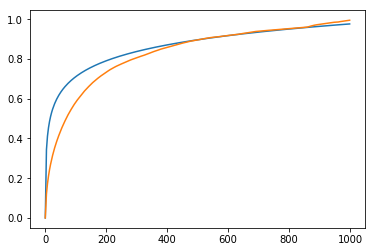

In [21]:
res_vect, res_para, res_cost = file_copy_0["S6 T7-2"]["Simu_Res"][0], file_copy_0["S6 T7-2"]["Simu_Res"][1], file_copy_0["S6 T7-2"]["Simu_Res"][2]
argmin = res_cost.index(min(res_cost))
print(res_para[argmin])
print(res_cost[argmin])
plt.plot(res_vect[argmin])
plt.plot(file_copy_0["S6 T7-2"]["Time_Series_Data"]["Vth_Shift/V"].dropna())
plt.show()

(1.2915496650148828e+16, 0.4975000000000003)
0.0747924678585605


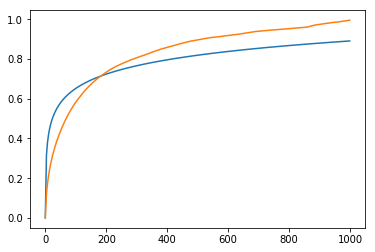

In [18]:
res_vect, res_para, res_cost = file_copy["S6 T7-2"]["Simu_Res"][0], file_copy["S6 T7-2"]["Simu_Res"][1], file_copy["S6 T7-2"]["Simu_Res"][2]
argmin = res_cost.index(min(res_cost))
print(res_para[argmin])
print(res_cost[argmin])
plt.plot(res_vect[argmin])
plt.plot(file_copy["S6 T7-2"]["Time_Series_Data"]["Vth_Shift/V"].dropna())
plt.show()

In [19]:
file_copy_0 = file_copy

In [38]:
with open('Bias_Data_NT_10to20.pickle', 'wb') as file:
    pickle.dump(file_dyct, file, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('Bias_Data_0.pickle', 'wb') as file:
#     pickle.dump(file_copy, file, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('Bias_Data_1.pickle', 'wb') as file:
#     pickle.dump(file_copy_0, file, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
import pickle 
with open("Bias_Data_1.pickle", "rb") as file:
    file_dyct = pickle.load(file)

In [5]:
for i in file_dyct.keys():
    res_cost = file_dyct[i]["Simu_Res"][2]
    argmin = res_cost.index(min(res_cost))
    print(i, res_cost[argmin], file_dyct[i]["Simu_Res"][1][argmin])

S6 T7-1 0.048924328023938285 (1.438449888287666e+16, 0.17500000000000002)
S6 T7-2 0.036787028716203624 (1.438449888287666e+16, 0.3875)
S6 T7-3 0.040084854946296516 (1.438449888287666e+16, 0.0725)
S9 T1 0.03210605809896831 (6951927961775591.0, 0.4975)
S9 T6-1 0.027185034539956517 (1.128837891684693e+16, 0.1225)
S9 T6-2 0.04334413556049661 (1.8329807108324376e+16, 0.195)
S9 T6-3 0.05594081052475581 (2.9763514416313132e+16, 0.0375)
S9 T7-1 0.07322839431027782 (1.128837891684693e+16, 0.4975)
S9 T7-2 0.09733554893718402 (2.9763514416313132e+16, 0.01)
S9 T7-3 0.12190002862321783 (3.792690190732238e+16, 0.0)
S9 T9-1 0.04052537857082512 (1.128837891684693e+16, 0.0)
S9 T9-2 0.04285604117925029 (1.438449888287666e+16, 0.18)
S9 T9-3 0.06276258878556723 (2.3357214690901212e+16, 0.0525)
S9 T9-4 0.05054364146753858 (2.9763514416313132e+16, 0.08750000000000001)
S9 T9-5 0.06961179498834072 (2.3357214690901212e+16, 0.12)
S9 T9-6 0.04438067242902783 (1.438449888287666e+16, 0.305)
S9 T9-7 0.0616198517440

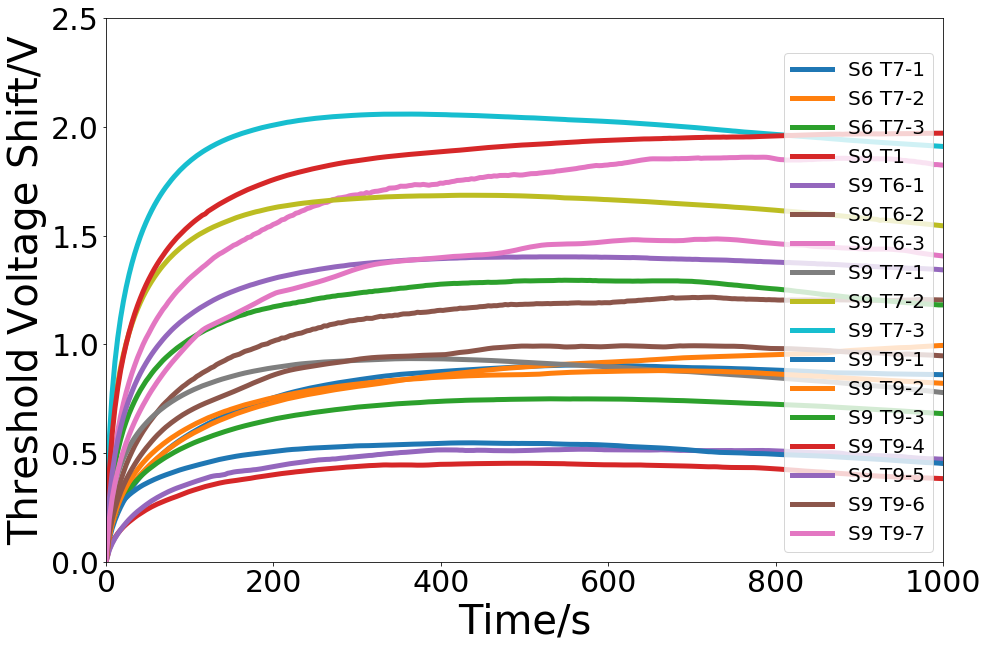

In [6]:
fig = plt.figure(figsize = (15, 10))
legend_box = []
for i in file_dyct.keys():
    legend_box.append(i)
    data = file_dyct[i]["Time_Series_Data"]["Vth_Shift/V"]
    plt.plot(data, linewidth = 5)

plt.xlim(0, 1000)
plt.ylim(0, 2.5)
plt.xlabel("Time/s", fontsize = 40)
plt.ylabel("Threshold Voltage Shift/V", fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(legend_box, loc = "lower right", fontsize = 20)
plt.show()

In [7]:
def Min_Max_Normalization(file_name):
    x = file_dyct[file_name]["Time_Series_Data"]["Id/A"]
#     file_dyct[file_name]["Time_Series_Data"]["Normalized_Id"] = 1-(x - x.min())/(x.max() - x.min()) 
    file_dyct[file_name]["Time_Series_Data"]["Normalized_Id"] = x/x[0]
for i in file_dyct.keys():
    Min_Max_Normalization(i)

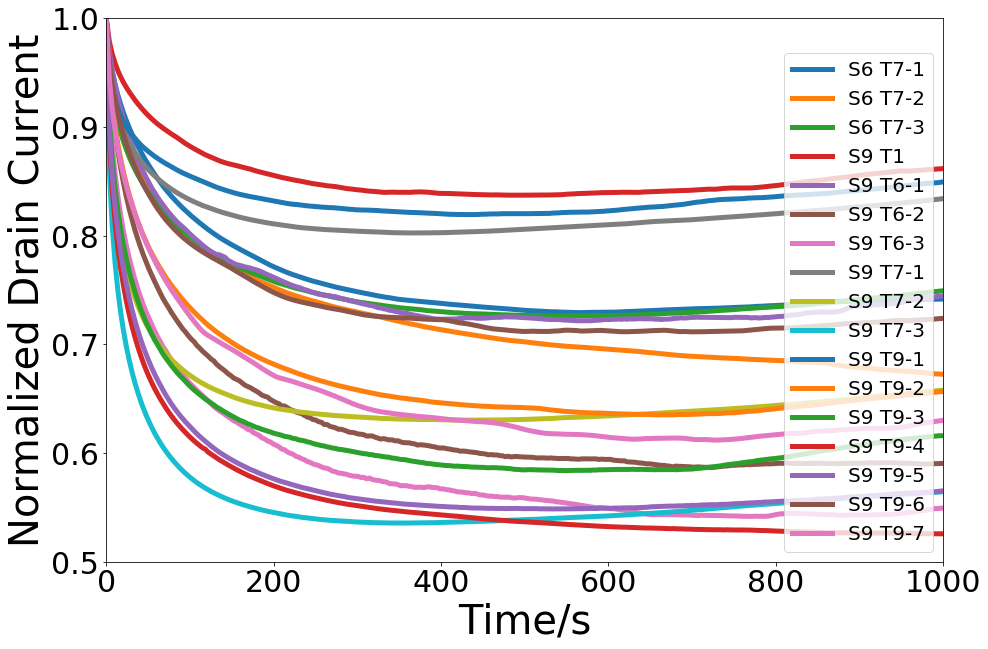

In [66]:
fig = plt.figure(figsize = (15, 10))
legend_box = []
for i in file_dyct.keys():
    legend_box.append(i)
    data = file_dyct[i]["Time_Series_Data"]["Normalized_Id"]
    plt.plot(data, linewidth = 5)

plt.xlim(0, 1000)
plt.ylim(0.5, 1)
plt.xlabel("Time/s", fontsize = 40)
plt.ylabel("Normalized Drain Current", fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(legend_box, loc = "lower right", fontsize = 20)
plt.show()

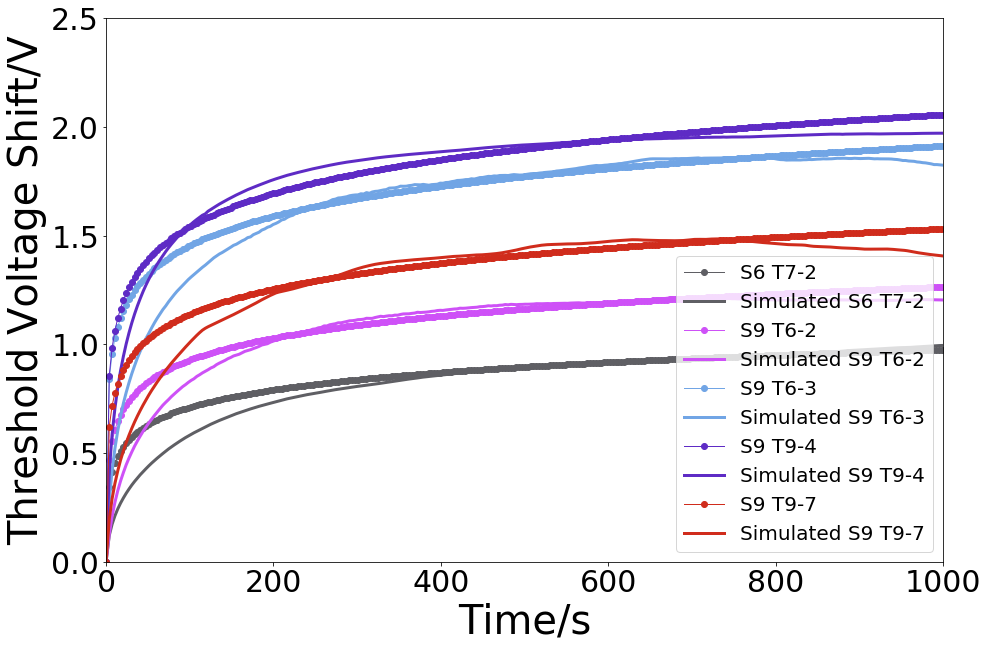

In [42]:
def Plotting(file):
    res_vect, res_para, res_cost = file["Simu_Res"][0], file["Simu_Res"][1], file["Simu_Res"][2]
    argmin = res_cost.index(min(res_cost))
    r,b,g = random.random(), random.random(), random.random()
    plt.plot(res_vect[argmin], marker = "o", color = (r, b, g), linewidth = 1)
    plt.plot(file["Time_Series_Data"]["Vth_Shift/V"].dropna(), color = (r, b, g), linewidth = 3)
    # plt.show()
    
fig = plt.figure(figsize=(15, 10))
legend_box = []

for i in ["S6 T7-2", "S9 T6-2", "S9 T6-3", "S9 T9-4", "S9 T9-7"]:
    legend_box.append(i)
    legend_box.append("Simulated " + i)
    Plotting(file_dyct[i])

plt.xlim(0, 1000)
plt.ylim(0, 2.5)
plt.xlabel("Time/s", fontsize = 40)
plt.ylabel("Threshold Voltage Shift/V", fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(legend_box, loc = "lower right", fontsize = 20)
plt.show()

S6 T7-2 0.036787028716203624


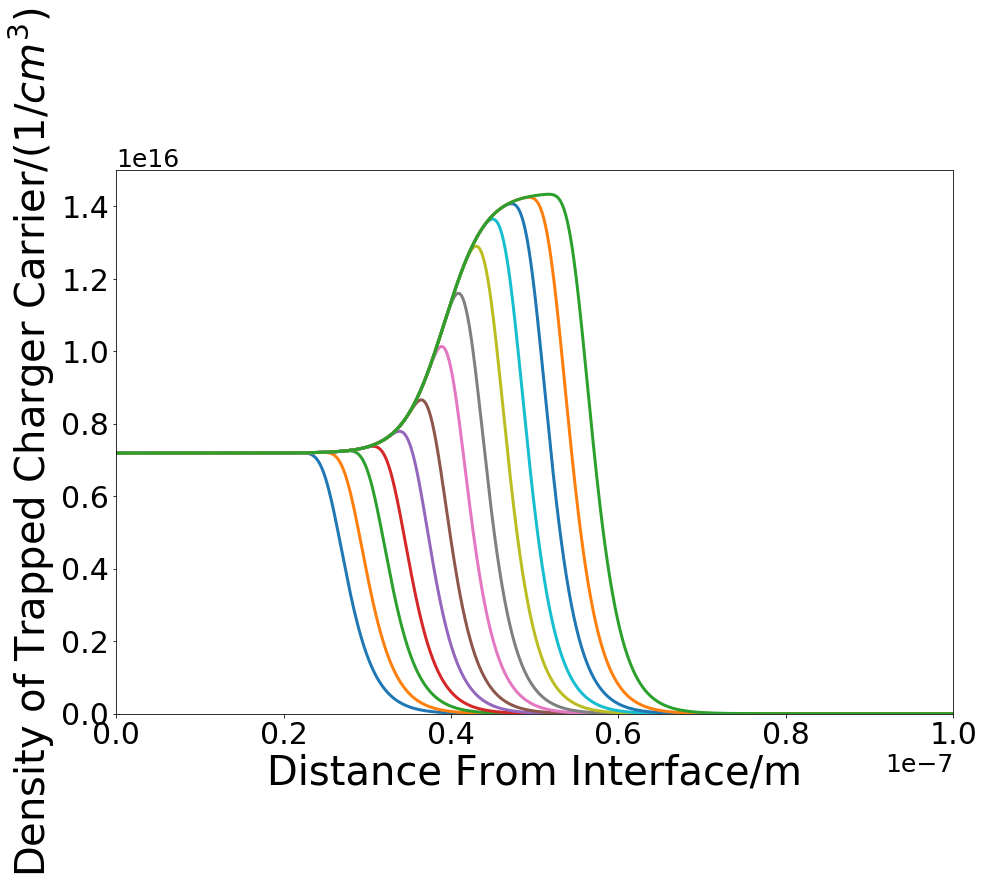

In [65]:
import matplotlib
matplotlib.rc('font', size=25)

def Plot_ntr(key):
    res_vect, res_para, res_cost = file_dyct[key]["Simu_Res"][0], file_dyct[key]["Simu_Res"][1], file_dyct[key]["Simu_Res"][2]
    argmin = res_cost.index(min(res_cost))
    print(key, res_cost[argmin])
    params = file_dyct[key]["Params_Lib"]
    params["NT/cm-3"], params["energy_diff/eV"] = res_para[argmin]
    x = np.arange(1e-10, 1e-7, 1e-10)

    fig = plt.figure(figsize=(15, 10))
    
    legend_box = []
    for t in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]:
        legend_box.append(str(t) + "s")
        ntr = Trapped_Electron(t, x, params)
        plt.plot(x, ntr, linewidth = 3)
    
    plt.xlabel("Distance From Interface/m", fontsize = 40)
    plt.ylabel("Density of Trapped Charger Carrier/$(1/cm^3)$", fontsize = 40)
    plt.xlim(0, 1e-7)
    plt.ylim(0, 1.5e16)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30) 
    plt.legend(legend_box, loc = "lower right", fontsize = 25)
    
# Plot_ntr("S6 T7-2")
# Plot_ntr("S9 T6-2")
# Plot_ntr("S9 T6-3")
# Plot_ntr("S9 T9-4")
# Plot_ntr("S9 T9-7")

Mean of NT 1.9315203262587616e+16
6951927961775591.0 3.792690190732238e+16
Mean of E 0.16647058823529412
0.0 0.4975


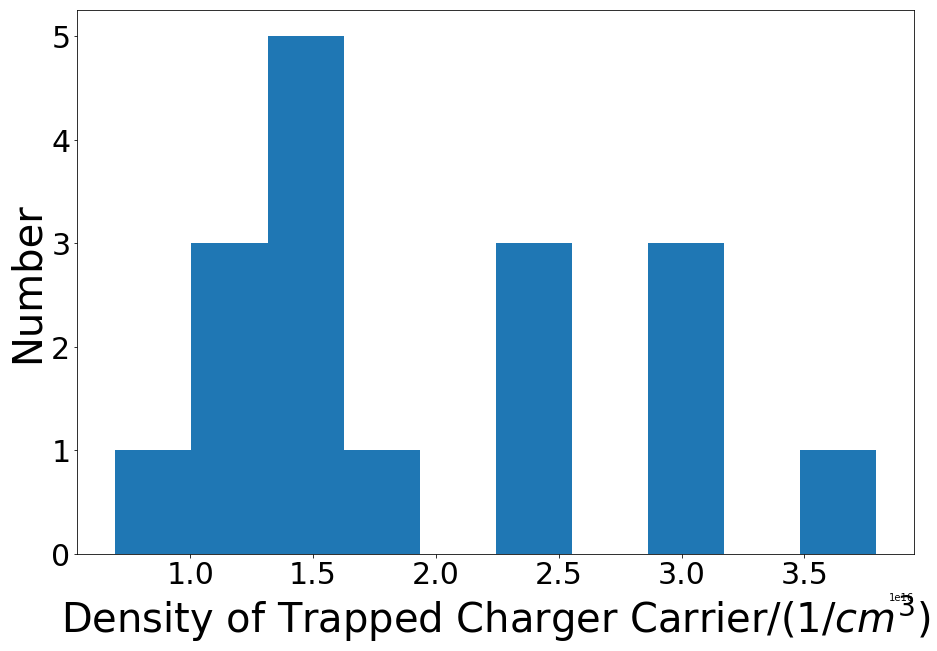

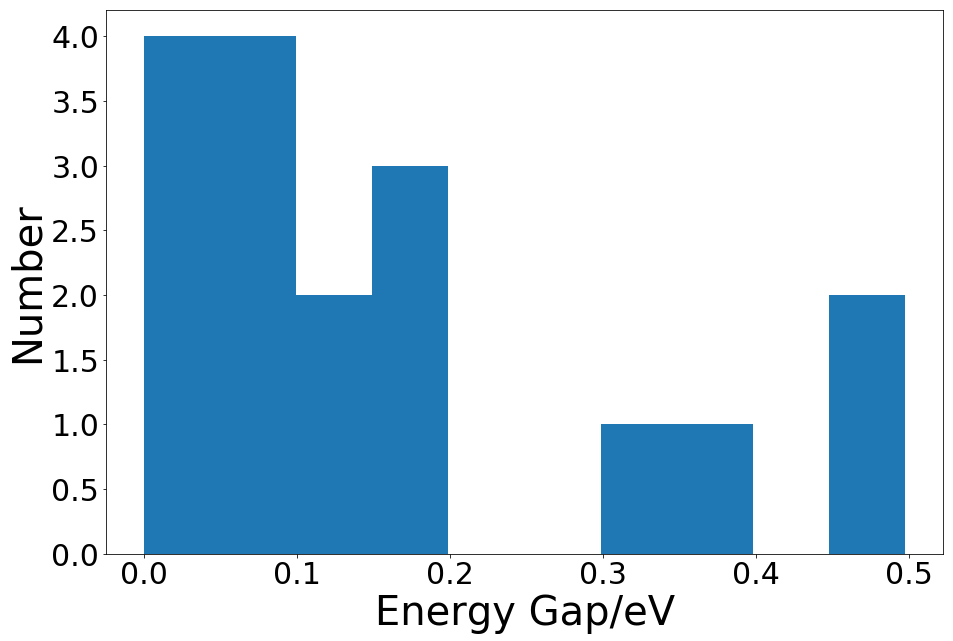

In [43]:
def NT_(key):
    res_vect, res_para, res_cost = file_dyct[key]["Simu_Res"][0], file_dyct[key]["Simu_Res"][1], file_dyct[key]["Simu_Res"][2]
    argmin = res_cost.index(min(res_cost))
    return res_para[argmin][0]

def E_(key):
    res_vect, res_para, res_cost = file_dyct[key]["Simu_Res"][0], file_dyct[key]["Simu_Res"][1], file_dyct[key]["Simu_Res"][2]
    argmin = res_cost.index(min(res_cost))
    return res_para[argmin][1]

def Param_Plot(file_dyct):
    NT_array, E_array = [], []
    for i in file_dyct.keys():
        NT_array.append(NT_(i))
        E_array.append(E_(i))
        
    NT_array = np.asarray(NT_array)
    print("Mean of NT", NT_array.mean())
    print(NT_array.min(), NT_array.max())
    E_array = np.asarray(E_array)
    print("Mean of E", E_array.mean())
    print(E_array.min(), E_array.max())
    
    fig1 = plt.figure(figsize = (15, 10))
    plt.hist(NT_array, bins = 10)
    plt.xlabel("Density of Trapped Charger Carrier/$(1/cm^3)$", fontsize = 40)
    plt.ylabel("Number", fontsize = 40)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30) 
    plt.show()
    fig2 = plt.figure(figsize = (15, 10))
    plt.hist(E_array, bins = 10)
    plt.xlabel("Energy Gap/eV", fontsize = 40)
    plt.ylabel("Number", fontsize = 40)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30) 
    plt.show()
    
Param_Plot(file_dyct)